In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pywt
import pywt.data
import cv2

%matplotlib inline

In [2]:
img = cv2.imread('MangoLeavesDatabase/Alphonso/front/alphonso_front_ts0e4bt26g5jz2u0rbsg9ndb.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Haar Wavelet Transform (2D Single Level)

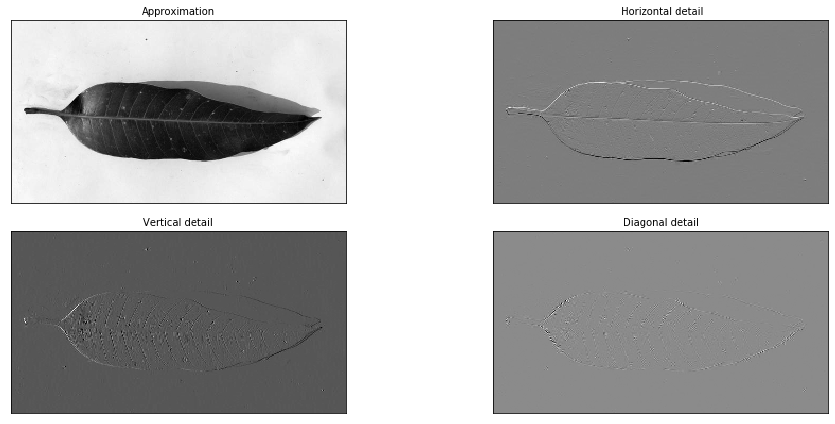

In [3]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

coeffs2 = pywt.dwt2(img, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(15, 6))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

# Contours
## Rectangular Bounding Box

No of shapes 17


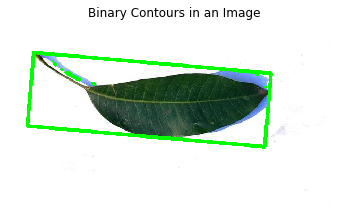

In [4]:
original_img = cv2.imread('MangoLeavesDatabase/Alphonso/front/alphonso_front_4fso23tcw5kzr1qgrj5sje48.jpg')
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
img2gray = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)

retval, img = cv2.threshold(img2gray,0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img = np.bitwise_not(img)
contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('No of shapes {0}'.format(len(contours)))

for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(original_img, [box], 0, (0, 255, 0), 5)
plt.figure('Contours')
plt.axis('off')
plt.imshow(img)
plt.title('Binary Contours in an Image')
plt.show()

# Contours
## Polygonal Boundary

No of shapes 17


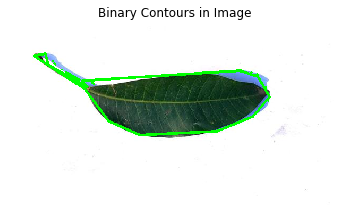

In [5]:
original_img = cv2.imread('MangoLeavesDatabase/Alphonso/front/alphonso_front_4fso23tcw5kzr1qgrj5sje48.jpg')
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
img2gray = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
retval, img = cv2.threshold(img2gray,0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('No of shapes {0}'.format(len(contours)))

for cnt in contours:
    # epsilon - is maximum distance from contour to approximated contour 
    # epsilon = error_rate * actual_arc_length
    epsilon = 0.01 * cv2.arcLength(cnt, True)
    
    # use approxPloyDP to approximate polygon
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    
    # draw the approximated contours around the image using drawContours
    img = cv2.drawContours(original_img, [approx], 0, (0, 255, 0), 3)

plt.figure('Contours')
plt.axis('off')
plt.imshow(original_img)
plt.title('Binary Contours in Image')
plt.show()

# Contours
## Image Features

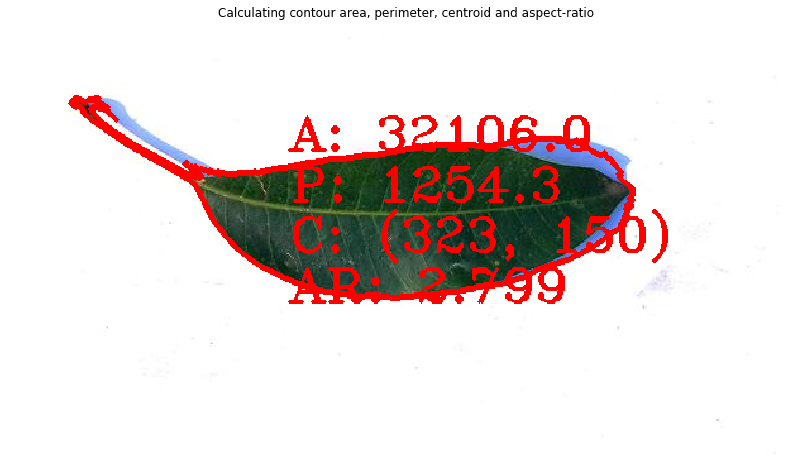

Mean Color in leaf portion: (174, 145, 139)


In [6]:
original_img = cv2.imread('MangoLeavesDatabase/Alphonso/front/alphonso_front_4fso23tcw5kzr1qgrj5sje48.jpg')
img2rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
img2gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
retval, img = cv2.threshold(img2gray,0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(contours) != 0:
    big_contour = max(contours, key=cv2.contourArea)
    
    # find moments of each contour using cv2.moments
    M = cv2.moments(big_contour)
    
    # finding center of the contour
    # m10 / m00, m01/ m00 -> center
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        # set values as what you need in the situation
        cX, cY = 0, 0
    
    # get the centroid of the contour
    centroid = (cX, cY)
    
    # get the aspect ratio of the contour
    x, y, w, h = cv2.boundingRect(big_contour)
    aspect_ratio = w / h
    
    # get the area of the contour using contourArea
    area = cv2.contourArea(big_contour)
    
    # getting the contour perimeter using arcLength
    perimeter = cv2.arcLength(big_contour, True)
    
    img = cv2.drawContours(img2rgb, [big_contour], 0, (255, 0, 0), 3)
    
    cv2.putText(img2rgb, "A: {0:2.1f}".format(area), (cX-100, cY-50),
               cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (255, 0, 0), 2)
    cv2.putText(img2rgb, "P: {0:2.1f}".format(perimeter), (cX-100, cY-10),
               cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (255, 0, 0), 2)
    cv2.putText(img2rgb, "C: ({0}, {1})".format(centroid[0], centroid[1]), (cX-100, cY+30),
               cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (255, 0, 0), 2)
    cv2.putText(img2rgb, "AR: {0:.4}".format(aspect_ratio), (cX-100, cY+70),
               cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (255, 0, 0), 2)
    plt.figure('Contours', figsize=(18, 8))
    plt.axis('off')
    plt.imshow(img2rgb)
    plt.title('Calculating contour area, perimeter, centroid and aspect-ratio')
    plt.show()
    
    # Get the mean color in leaf contour area
    leaf_portion = img2rgb[y:y+h, x:x+w]
    r_mean = int(np.mean(leaf_portion[:, :, 0]))
    g_mean = int(np.mean(leaf_portion[:, :, 1]))
    b_mean = int(np.mean(leaf_portion[:, :, 2]))
    print("Mean Color in leaf portion: {0}".format((r_mean, g_mean, b_mean)))
    
else:
    print('No contour found in the image')

# Clustering - K Means

## Dominant Color Detection

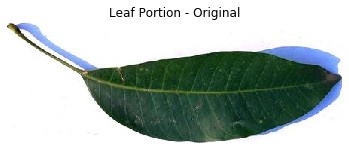

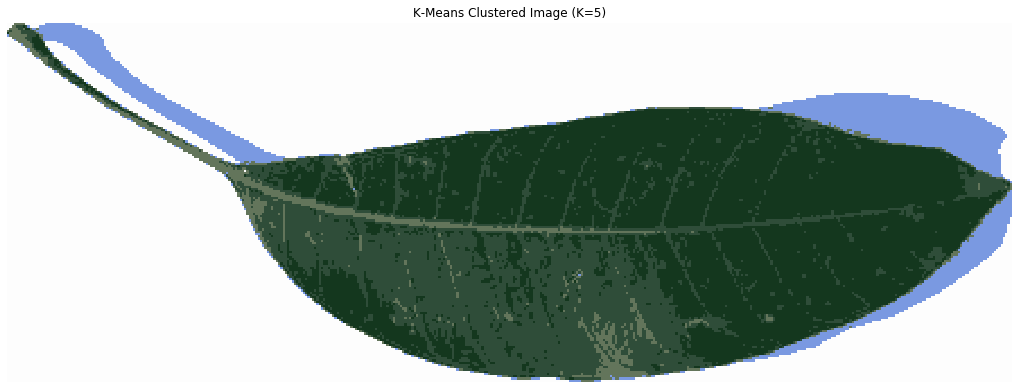

centers [[ 47  77  57]
 [253 253 253]
 [ 99 117  91]
 [122 153 225]
 [ 20  55  30]]
Dominant Color: [[253 253 253]]


In [7]:
original_img = cv2.imread('MangoLeavesDatabase/Alphonso/front/alphonso_front_4fso23tcw5kzr1qgrj5sje48.jpg')
img2rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
img2gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
retval, img = cv2.threshold(img2gray,0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(contours) != 0:
    leaf_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(leaf_contour)
    leaf_segment = img2rgb[y:y+h, x:x+w]
    plt.imshow(leaf_segment)
    plt.title('Leaf Portion - Original')
    plt.axis('off')
    plt.show()
    
     # Get the dominant color in leaf contour area
    leaf_pixels = leaf_segment.reshape((-1, 3))
    leaf_pixels = np.float32(leaf_pixels)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 5
    ret,label,center = cv2.kmeans(leaf_pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(leaf_segment.shape)
    
    plt.figure('Clustered Image', figsize=(18, 8))
    plt.axis('off')
    plt.imshow(result)
    plt.title('K-Means Clustered Image (K={0})'.format(K))
    plt.show()

    _,count = np.unique(label.flatten(), return_counts=True)
    dominant_color = center[label[count.argmax()]]
    print('centers', center)
    print('Dominant Color:', str(dominant_color))

else:
    print('No contour found in image')

## Alternative method for perfect contour without shadow

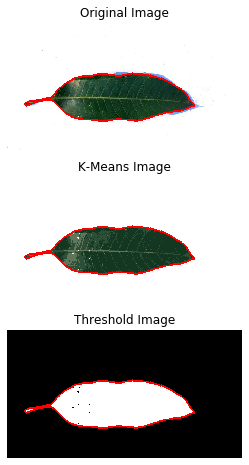

In [8]:
# Read an Image from dataset
original_img = cv2.imread('MangoLeavesDatabase/Alphonso/front/alphonso_front_8n0wwkn765agjmciisobrbk5.jpg')
# Convert color channels from BGR to RGB
img2rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
# Apply K-Means to reduce color space in image
img_pixels = np.float32(img2rgb.reshape((-1, 3)))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5 # no of clusters
ret,labels,centers = cv2.kmeans(img_pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
cluster_img = centers[labels.flatten()]
# Change all non-green pixels to white in clustered image
for i,p in enumerate(cluster_img):
    if p[1] < p[0] or p[1] < p[2]:
        cluster_img[i] = [255, 255, 255]
cluster_img = cluster_img.reshape(img2rgb.shape)
# Apply thresholding to clustered image
cluster_img2gray = cv2.cvtColor(cluster_img, cv2.COLOR_RGB2GRAY)
retval, th_img = cv2.threshold(cluster_img2gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# Find contours in threshold image
contours, _ = cv2.findContours(th_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(contours) != 0:
    # Get contour with largest area as leaf contour
    leaf_contour = max(contours, key=cv2.contourArea)
    # Get the bounding box for leaf contour
    x, y, w, h = cv2.boundingRect(leaf_contour)
    # Draw contours on original, clustered and threashold images
    img1 = cv2.drawContours(img2rgb, [leaf_contour], 0, (255,0,0), 4)
    img2 = cv2.drawContours(cluster_img, [leaf_contour], 0, (255,0,0), 4)
    img3 = cv2.drawContours(cv2.cvtColor(th_img, cv2.COLOR_GRAY2RGB), [leaf_contour], 0, (255,0,0), 4)
    # Display Results
    titles = ['Original Image','K-Means Image', 'Threshold Image']
    imgs = [img1, img2, img3]
    plt.figure('Leaf', figsize=(18, 8))
    for i in range(0, 3):
        plt.subplot(3, 1, i+1)
        plt.axis('off')
        plt.title(titles[i])
        plt.imshow(imgs[i])
    plt.show()
else:
    print('No contour found in image')